# <center> <font color=#B40404>Computer Vision & CNN Project 2</center>
    
## <center> <font color=#B40404>Submitted by Utathya Ghosh</center>
    
### <center> <font color=#B40404>Batch - AIML Online Jan 21-A</center>

# <center>PART TWO</center>
# <center>PROJECT BASED</center>
# <center>TOTAL SCORE - 30</center>

DOMAIN: Face recognition

CONTEXT: Company X intends to build a face identification model to recognise human faces.

DATA DESCRIPTION: The dataset comprises of images and its mask where there is a human face.

PROJECT  OBJECTIVE: Face  Aligned  Face  Dataset  from  Pinterest.  This  dataset  contains  10,770  images  for  100  people.  All  images  are  taken from 'Pinterest' and aligned using dlib library.

In [ ]:
# Import all packages
import pandas as pd
import numpy as np
from zipfile import ZipFile
from PIL import Image
import tensorflow as tf
# import os
from google.colab import drive
from IPython.display import clear_output
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation
from tensorflow.keras.models import Model
import re
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn import svm

TASK: In  this  problem,  we  use  a  pre-trained  model  trained  on  Face  recognition  to  recognise  similar  faces.  Here,  we  are  particularly interested in recognising whether two given faces are of the same person or not.

#### Load the dataset and create the metadata.

In [ ]:
# Load google drive for all data
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
# Load filename of all images
file_name = "/content/drive/My Drive/Data/Part 3 - Aligned Face Dataset from Pinterest.zip"
ls_shape = []

# opening the zip file in READ mode
with ZipFile(file_name, 'r') as myzip:
    # storing all the contents of the zip file
    ls_name = myzip.namelist()
# Close access to zip file
myzip.close()

# Create a variable with total number of images for Completion state
tot = len(ls_name)

In [ ]:
# Checking the shape of all images
cnt = 0
ls_shape = []

with tf.device('/device:GPU:0'):
  # Store dimensions of each image for further analysis
  # opening the zip file in READ mode
  with ZipFile(file_name, 'r') as myzip:
    # Extracting each image filename
    for path in ls_name:
      # Extracting each image
      with myzip.open(path, mode='r') as myfile:
        cnt+=1
        
        # Opening the image
        picture = Image.open(myfile)
        
        # Saving the dimension of the image
        ls_shape.extend([np.array(picture).shape])

        # Progress report visualisation
        clear_output(wait=False)
        print("Completed : %.2f%%" %((cnt/tot)*100))
      
      # Close access to file
      myfile.close()
  # Close access to zip file
  myzip.close()

Completed : 100.00%


In [ ]:
# Displaying dimensions of each image
ls_shape

[(301, 299, 3),
 (299, 299, 3),
 (299, 299, 3),
 (299, 299, 3),
 (299, 299, 3),
 (299, 299, 3),
 (299, 299, 3),
 (299, 299, 3),
 (299, 299, 3),
 (301, 299, 3),
 (299, 299, 3),
 (299, 299, 3),
 (299, 299, 3),
 (299, 299, 3),
 (299, 299, 3),
 (299, 299, 3),
 (299, 299, 3),
 (299, 299, 3),
 (299, 299, 3),
 (299, 299, 3),
 (299, 299, 3),
 (299, 299, 3),
 (299, 299, 3),
 (301, 299, 3),
 (299, 299, 3),
 (299, 299, 3),
 (299, 299, 3),
 (296, 299, 3),
 (299, 299, 3),
 (299, 299, 3),
 (299, 299, 3),
 (299, 299, 3),
 (299, 299, 3),
 (299, 299, 3),
 (299, 299, 3),
 (299, 299, 3),
 (299, 299, 3),
 (299, 299, 3),
 (299, 299, 3),
 (299, 299, 3),
 (299, 299, 3),
 (299, 299, 3),
 (299, 299, 3),
 (299, 299, 3),
 (299, 299, 3),
 (299, 299, 3),
 (299, 299, 3),
 (299, 299, 3),
 (299, 299, 3),
 (299, 299, 3),
 (299, 299, 3),
 (299, 299, 3),
 (299, 299, 3),
 (299, 299, 3),
 (299, 299, 3),
 (299, 299, 3),
 (299, 299, 3),
 (299, 299, 3),
 (299, 299, 3),
 (299, 299, 3),
 (299, 299, 3),
 (299, 299, 3),
 (299, 2

In [ ]:
# Initialising independent and target variables
cnt = 0
label = []
data = []
basewidth = 224

with tf.device('/device:GPU:0'):
  # Extracting meta data of image on storing it in data
  # opening the zip file in READ mode
  with ZipFile(file_name, 'r') as myzip:
    # Extracting each image filename
    for path in ls_name:
      cnt+=1
      # Extracting each image
      with myzip.open(path, mode='r') as myfile:
        # Opening the image
        picture = Image.open(myfile)

        # When picture is not square padding the image to make it a square
        if picture.size[0]!= picture.size[1]:
          left = max(0, (picture.size[0] - picture.size[1])//2)
          top = max(0, (picture.size[1] - picture.size[0])//2)
          result = Image.new(picture.mode, (max(picture.size[0], picture.size[1]), max(picture.size[0], picture.size[1])), (0, 0, 255))
          result.paste(picture, (left, top))
          picture = result
          
        # Resize picture to required input size of 224
        picture = picture.resize((basewidth, basewidth), Image.ANTIALIAS)

        # Load metadata of resized image to data
        data.append(np.array(picture))

        # Load Label name to Label
        label.append(path.split('/')[-1].split('.')[0])

        # Progress report visualisation
        clear_output(wait=True)
        print("Completed : %.2f%%" %((cnt/tot)*100))
        
      # Close access to file
      myfile.close()
  # Closing Zipfile
  myzip.close()

Completed : 100.00%


#### Check some samples of metadata.

(224, 224, 3)

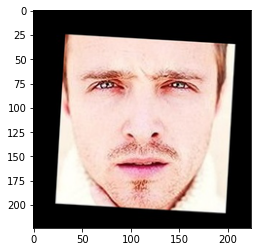

In [ ]:
# Visualising an image and its dimension
plt.imshow(data[1])
data[1].shape

#### Load the pre-trained model and weights.

In [ ]:
# Defining the VGG_Face Architecture
def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

In [ ]:
# Now loading the pre-trained weights
file_name = "/content/drive/My Drive/Data/Part 3 - vgg_face_weights.h5"

# Getting the model and loading pre-trained weights
model = vgg_face()
model.load_weights(file_name)

# Defining the Embedding model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

In [ ]:
# Compiling regex to extract just the celebrity name
regex = re.compile('[^a-zA-Z ]')

# Extract respective images celebrity name
for idx in range(len(label)):
  label[idx] = regex.sub('', label[idx])

#### Generate Embedding vectors for each face in the dataset.

In [ ]:
# Extracting Embedding vector for each image
# Initialising embedding vector list
df_emb = []

with tf.device('/device:GPU:0'):
  # Running through each embedding vector
  for idx in range(len(data)):
    # Normalise image meta data
    img = (data[idx] / 255.).astype(np.float32)

    # Store embedding vector in list
    df_emb.append(vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0])

    # Progress report visualisation
    clear_output(wait=False)
    print("Completed : %.2f%%" %((idx/tot)*100))

# Convert embedding vector list to a dataframe
df_emb = pd.DataFrame(df_emb)

# Add the Label column with celebrity names
df_emb["Label"] = label

# Display embedding dataframe
df_emb.head()

Completed : 100.00%


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2583,2584,2585,2586,2587,2588,2589,2590,2591,2592,2593,2594,2595,2596,2597,2598,2599,2600,2601,2602,2603,2604,2605,2606,2607,2608,2609,2610,2611,2612,2613,2614,2615,2616,2617,2618,2619,2620,2621,Label
0,0.028739,-0.016146,-0.013136,0.021250,0.001542,0.016455,0.018642,0.004531,0.014107,0.004089,0.028335,0.019101,0.034490,0.022461,0.026692,0.001988,0.021616,0.025416,-0.010478,0.004012,0.000382,0.028961,0.003077,0.024400,-0.010904,0.009212,-0.004356,-0.004821,0.005435,0.017242,0.012835,-0.001039,-0.014113,0.010879,0.008754,0.001145,0.002727,-0.010660,0.007677,0.003507,...,-0.013215,-0.001463,-0.015832,-0.004962,0.016224,0.011758,-0.003347,0.000450,-0.000770,-0.032557,-0.010604,-0.002596,-0.019637,0.001327,-0.011826,-0.016053,-0.011082,-0.003196,-0.015449,-0.021395,-0.015815,-0.018230,-0.006994,0.019456,0.000920,-0.014216,-0.001074,-0.015284,0.009748,-0.011826,-0.008271,-0.027511,-0.005122,0.010453,-0.009126,-0.024400,0.001047,0.000207,-0.009699,Aaron Paul
1,0.034036,-0.001779,-0.012427,0.025848,0.025952,0.030081,0.001366,0.016628,-0.001530,0.003943,0.016803,0.008993,0.001012,0.001508,0.017045,0.011165,0.016970,0.011938,0.016100,0.000510,0.013333,0.016992,0.013743,0.028382,0.010580,-0.003782,0.001906,0.005605,0.003110,0.009634,0.013936,-0.008508,-0.011365,0.025514,-0.002562,-0.011945,-0.014042,-0.018763,0.007519,-0.002413,...,-0.001115,0.006645,-0.025384,0.014200,0.008083,0.002189,-0.002855,-0.007107,0.015710,-0.006484,0.002863,0.013621,-0.019304,-0.007762,0.002268,-0.001176,-0.006951,-0.018175,-0.006648,-0.011133,0.014033,0.004520,-0.021943,0.026974,0.025117,0.007628,-0.000640,0.002882,0.008010,0.005879,0.002845,-0.003224,0.001824,0.014505,-0.017470,-0.018020,-0.010433,0.001832,0.024231,Aaron Paul
2,0.028527,-0.000886,-0.012698,0.029850,0.032348,0.023654,0.000880,0.015909,-0.010513,0.011835,0.010415,0.011333,-0.003190,-0.009615,0.011887,0.007776,0.025677,0.006801,0.017685,0.008275,0.013911,0.024212,0.013702,0.034980,0.015332,-0.001094,0.006469,0.007862,0.004839,0.002340,0.017754,-0.006167,-0.007728,0.028522,-0.006926,-0.012809,-0.014077,-0.014573,0.013003,-0.003401,...,-0.001030,0.004215,-0.019577,0.015560,0.021229,0.003966,0.007698,-0.003771,0.019908,-0.003450,-0.001273,0.013647,-0.019750,-0.004970,0.007991,0.001733,-0.007935,-0.015357,-0.009614,-0.005739,0.006973,0.003286,-0.015961,0.021113,0.019884,0.001846,-0.009306,0.003591,0.001728,0.001379,0.011215,0.001064,-0.005149,0.026326,-0.015027,-0.013392,-0.009301,-0.006089,0.021417,Aaron Paul
3,0.014376,-0.005189,-0.001566,0.019824,0.015786,0.027983,0.001922,0.018323,-0.004072,0.017936,0.020196,0.004098,0.006664,-0.004305,0.017373,0.001515,0.028359,0.012688,0.016413,0.004051,0.009275,0.018449,0.013838,0.012971,0.006507,0.013252,0.020080,0.010719,0.014720,0.013794,0.015548,-0.002210,-0.009221,0.026353,-0.010364,-0.000174,-0.009016,-0.005595,0.005029,-0.004872,...,-0.006558,-0.001567,-0.013311,0.007925,0.016976,0.006532,0.007957,-0.000210,0.007116,-0.010911,-0.000933,0.011547,-0.013844,-0.010144,0.007351,-0.002562,0.010865,-0.010684,-0.006221,0.001301,0.001599,-0.001188,-0.010770,0.019260,0.015215,-0.004045,-0.011962,0.008804,0.008079,-0.001829,-0.003469,-0.005694,0.004116,0.005295,-0.012475,-0.012555,-0.004949,-0.005603,0.015793,Aaron Paul
4,0.033406,-0.005534,0.000517,0.024665,0.016374,0.018799,0.005611,0.013718,-0.003117,0.001294,0.005993,0.001105,0.011071,0.018284,0.015682,-0.002679,0.017843,0.011333,0.004694,-0.007887,-0.004523,0.015091,0.013778,0.019365,0.003359,-0.001129,0.001037,0.001665,0.011011,0.011597,0.017084,0.001480,-0.019202,0.027819,0.002902,-0.004007,-0.002077,-0.011977,0.007432,-0.006247,...,-0.016234,0.008565,-0.012413,0.003211,0.011624,0.003598,-0.012411,-0.006130,0.004742,-0.017265,-0.001546,0.004651,-0.015602,-0.008123,-0.006973,0.002166,-0.012300,-0.013173,-0.007102,0.001428,-0.003123,-0.003557,-0.001918,0.009989,0.013143,0.003794,-0.005793,-0.01

In [ ]:
df_emb.to_csv("Embedding.csv", index=False)

In [ ]:
!cp Embedding.csv "drive/My Drive/"

In [ ]:
file_name = "/content/drive/My Drive/Embedding.csv"
df_emb = pd.read_csv(file_name)
df_emb.head()

TypeError: ignored

#### Build distance metrics for identifying the distance between two given images

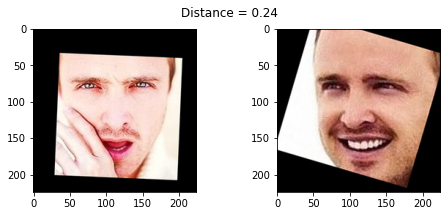

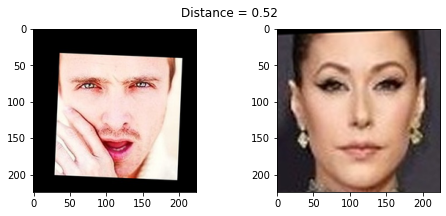

In [ ]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

idx1 = [2, 2]
idx2 = [5, 180]

for idx in range(len(idx1)):
  plt.figure(figsize=(8,3))
  plt.suptitle(f'Distance = {distance(df_emb.iloc[idx1[idx], :-1], df_emb.iloc[idx2[idx], :-1]):.2f}')
  plt.subplot(121)
  plt.imshow(data[idx1[idx]])
  plt.subplot(122)
  plt.imshow(data[idx2[idx]])

#### Use PCA for dimensionality reduction.

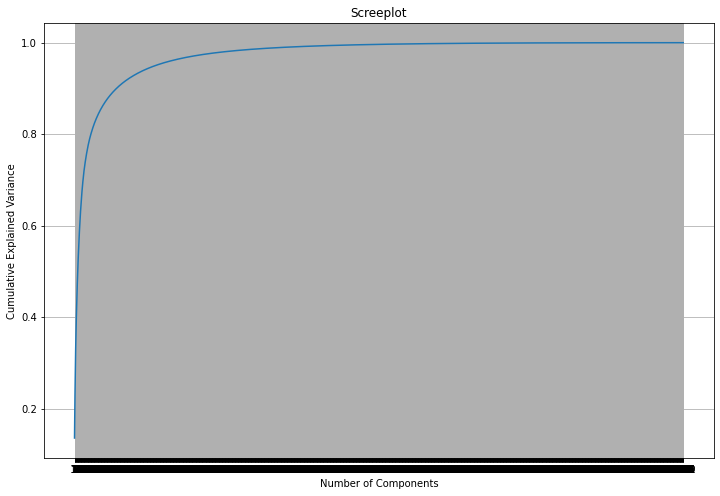

First 908 components explain 99.00234% of the variance of the selected features


In [ ]:
# Create the object Standard Scaler
scaler = StandardScaler()

# Scale all embedding vector values
X = scaler.fit_transform(df_emb.iloc[:, :-1])

# Initialise PCA
pca = PCA(svd_solver='randomized', random_state=42)

# Fit PCA to the required features after scaling
pca.fit(X)

# Display the screeplot to determine how many components to keep
fig = plt.figure(figsize = (12, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.xticks(range(len(pca.explained_variance_ratio_)), range(1, len(pca.explained_variance_ratio_)+1))
plt.ylabel("Cumulative Explained Variance")
plt.title("Screeplot")
plt.grid()
plt.show()

# Figure out how many components are required for 99% of the information
idx=0
for x in pca.explained_variance_ratio_[:].cumsum():
    idx+=1
    if x > 0.99: break

# Display amount of variance explained
print("First %d components explain %2.5f%% of the variance of the selected features" 
      %(idx, sum(pca.explained_variance_ratio_[:idx])*100))

# Reinitialising PCA with the required number of components
pca = PCA(n_components=idx, svd_solver='randomized', random_state=42)

# Assigning new features to the data
X = pca.fit_transform(X)

In [ ]:
# Initialising Label Encoder
le = preprocessing.LabelEncoder()

# Label encode
y = le.fit_transform(df_emb["Label"])

In [ ]:
df_emb.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2582,2583,2584,2585,2586,2587,2588,2589,2590,2591,2592,2593,2594,2595,2596,2597,2598,2599,2600,2601,2602,2603,2604,2605,2606,2607,2608,2609,2610,2611,2612,2613,2614,2615,2616,2617,2618,2619,2620,2621
count,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,...,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000,21540.000000
mean,0.010820,-0.000306,0.002830,0.008686,0.008174,0.012467,0.004284,0.014400,0.003854,0.007300,0.020637,0.004208,0.014499,0.004830,0.014774,0.002538,0.017672,0.013179,0.005400,0.008375,0.015289,0.014731,0.007566,0.014914,0.006048,0.000634,0.002178,0.002980,0.010202,0.015810,0.013660,0.001404,-0.005445,0.012168,0.008188,0.008773,0.003064,-0.008643,0.007534,0.003643,...,-0.013107,-0.011012,0.005107,-0.015717,-0.000816,0.009515,0.001038,0.002157,-0.005633,0.002195,-0.008667,-0.003845,0.016853,-0.014248,0.005459,-0.008850,-0.004457,-0.006500,0.005655,-0.009845,-0.006068,-0.008701,-0.010553,-0.012505,0.018283,0.008700,-0.000520,-0.002999,-0.006050,0.003272,-0.007320,-0.003580,-0.008964,0.012219,0.011735,-0.011069,-0.012585,-0.014418,0.005908,0.013480
std,0.009544,0.011784,0.010488,0.010665,0.011686,0.009466,0.012520,0.010351,0.009443,0.012681,0.011158,0.009868,0.010076,0.011906,0.008917,0.013659,0.008895,0.010183,0.011500,0.012994,0.010607,0.008665,0.011779,0.009337,0.011052,0.011442,0.009861,0.010013,0.008952,0.011445,0.007769,0.009980,0.010653,0.010815,0.010098,0.012239,0.012412,0.010551,0.012284,0.010242,...,0.011583,0.010605,0.010642,0.011890,0.011410,0.008797,0.009973,0.012145,0.011864,0.012534,0.012125,0.009649,0.013006,0.010212,0.009195,0.010507,0.010276,0.011374,0.010798,0.007639,0.012303,0.011725,0.008877,0.010737,0.008327,0.009480,0.011386,0.010543,0.010753,0.011702,0.009930,0.011976,0.013004,0.013826,0.011167,0.010974,0.010722,0.010637,0.010609,0.013020
min,-0.023305,-0.047758,-0.034863,-0.042811,-0.033491,-0.019262,-0.040437,-0.022059,-0.027306,-0.039716,-0.009850,-0.034345,-0.023350,-0.034387,-0.020618,-0.040643,-0.020430,-0.028957,-0.031877,-0.032127,-0.026683,-0.016557,-0.035746,-0.021749,-0.029776,-0.048681,-0.028240,-0.041134,-0.018346,-0.021399,-0.011766,-0.032294,-0.045359,-0.023054,-0.030216,-0.029657,-0.038227,-0.045314,-0.048150,-0.029314,...,-0.053347,-0.049693,-0.040365,-0.058772,-0.041038,-0.023803,-0.032045,-0.033939,-0.043400,-0.035640,-0.053074,-0.037623,-0.027557,-0.051811,-0.027665,-0.048497,-0.043537,-0.046277,-0.025282,-0.034331,-0.053988,-0.051774,-0.041293,-0.050669,-0.016189,-0.023213,-0.049762,-0.043358,-0.044368,-0.043716,-0.043842,-0.040213,-0.054371,-0.039587,-0.028218,-0.051822,-0.050323,-0.062832,-0.027687,-0.029185
25%,0.004369,-0.008267,-0.004217,0.001735,0.000046,0.005885,-0.004216,0.007382,-0.002512,-0.000013,0.012371,-0.002387,0.007865,-0.003398,0.008900,-0.005428,0.011550,0.006420,-0.002419,-0.000648,0.008416,0.008946,0.000165,0.008360,-0.001427,-0.006708,-0.004454,-0.003358,0.004091,0.008145,0.008390,-0.005436,-0.012687,0.004899,0.001435,0.00007

#### Build an SVM classifier in order to map each image to its right person.

In [ ]:
# Creating Parameter Grid for Grid Search
param_grid = [
  {'C': [1, 10], 'kernel': ['linear']},
  {'C': [1, 10], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
  {'C': [1, 10], 'kernel': ['poly']},
  {'C': [1, 10], 'kernel': ['sigmoid']},
 ]

# Defining the estimator model, Selecting One Versus One for multiclass accuracy metric
estimator = svm.SVC(decision_function_shape='ovo', random_state=42)

with tf.device('/device:GPU:0'):
  gsv = GridSearchCV(estimator, param_grid, cv=3, scoring='accuracy', return_train_score=True, verbose=2, n_jobs=-1)

  gsv.fit(X, y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 84.2min finished


In [ ]:
pd.DataFrame(gsv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,36.981177,0.632091,65.669719,0.489520,1,linear,NaN,"{'C': 1, 'kernel': 'linear'}",0.999721,0.999721,0.999721,0.999721,1.110223e-16,1,0.999861,0.999861,0.999861,0.999861,0.000000e+00
1,36.009312,0.102438,66.238429,0.510554,10,linear,NaN,"{'C': 10, 'kernel': 'linear'}",0.999721,0.999721,0.999721,0.999721,1.110223e-16,1,0.999861,0.999861,0.999861,0.999861,0.000000e+00
2,196.426971,2.448337,100.492008,0.321467,1,rbf,0.001,"{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}",0.999443,0.999443,0.999443,0.999443,0.000000e+00,6,0.999721,0.999721,0.999721,0.999721,1.110223e-16
3,76.679010,2.685794,110.022709,1.715493,1,rbf,0.0001,"{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}",0.985515,0.984262,0.983705,0.984494,7.571730e-04,7,0.989276,0.988510,0.989345,0.989044,3.785865e-04
4,200.260660,1.390034,97.601863,0.908717,10,rbf,0.001,"{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}",0.999721,0.999721,0.999721,0.999721,1.110223e-16,1,0.999861,0.999861,0.999861,0.999861,0.000000e+00
5,52.122726,1.618875,81.317448,2.249050,10,rbf,0.0001,"{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}",0.999443,0.999582,0.999582,0.999536,6.565523e-05,5,0.999721,0.999791,0.999791,0.999768,3.282761e-05
6,138.546892,2.898824,72.705052,3.429237,1,poly,NaN,"{'C': 1, 'kernel': 'poly'}",0.981894,0.982730,0.980780,0.981801,7.987303e-04,8,0.985794,0.986769,0.985794,0.986119,4.595866e-04
7,105.967245,1.228400,59.127733,3.666614,10,poly,NaN,"{'C': 10, 'kernel': 'poly'}",0.999721,0.999721,0.999582,0.999675,6.565523e-05,4,0.999861,0.999861,0.999791,0.999838,3.282761e-05
8,48.917394,0.209339,89.178626,1.673570,1,sigmoid,NaN,"{'C': 1, 'kernel': 'sigmoid'}",0.974791,0.973955,0.973538,0.974095,5.211222e-04,10,0.977925,0.978760,0.978552,0.978412,3.550849e-04
9,31.966571,0.594669,67.984797,0.903138,10,sigmoid,NaN,"{'C': 10, 'kernel': 'sigmoid'}",0.974791,0.977437,0.977577,0.976602,1.281539e-03,9,0.980292,0.980641,0.981407,0.980780,4.654117e-04


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

#### Import the the test image. Display the image. Use the SVM trained model to predict the face.

Name:  Dwayne Johnson
Dimensions:  (299, 299)
Prediction is Dwayne Johnson


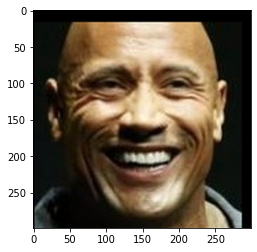

In [ ]:
 def test_image(path, basewidth=224):
  # Extracting image
  picture = Image.open(path)

  # Displaying Image  
  plt.imshow(picture)

  # Displaying image information
  regex = re.compile('[^a-zA-Z ]')
  name = regex.sub('', path.split('/')[-1].split('.')[0].split('-')[-1].strip())

  print("Name: ", name)
  print("Dimensions: ", picture.size)

  # Padding if picture is not square
  if picture.size[0]!= picture.size[1]:
    left = max(0, (picture.size[0] - picture.size[1])//2)
    top = max(0, (picture.size[1] - picture.size[0])//2)
    result = Image.new(picture.mode, (max(picture.size[0], picture.size[1]), max(picture.size[0], picture.size[1])), (0, 0, 255))
    result.paste(picture, (left, top))
    picture = result
    
  # Resize picture to required input size of 224
  picture = picture.resize((basewidth, basewidth), Image.ANTIALIAS)

  # Close access to zip file
  myfile.close()

  picture = (np.array(picture) / 255.).astype(np.float32)
  X_test = vgg_face_descriptor.predict(np.expand_dims(picture, axis=0))
  X_test = pca.transform(scaler.transform(X_test))
  print("Prediction is", le.inverse_transform(gsv.predict(X_test))[0])

  return

test_image("/content/drive/My Drive/Data/Part 2 - Test Image - Dwayne Johnson4.jpg")

Name:  Benedict Cumberbatch
Dimensions:  (299, 299)
Prediction is Benedict Cumberbatch


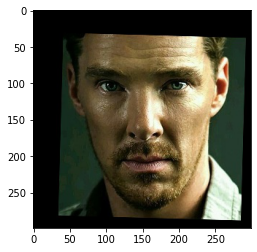

In [ ]:
test_image("/content/drive/My Drive/Data/Part 2- Test Image - Benedict Cumberbatch9.jpg")